# Business Understanding

Superconductors are vital to a variety of applications due to their special electrical and electromagnetic properties. The goal is to build a predictive model to help scientist best understand what major components allow for the best critical temperatures, while being able to predict if a new material will meet the criteria of a superconductor.

# Data Evaluation

The original data was made up of two smaller datasets. The first dataset includes the elemental breakdown of a material such as hydrogen, iron, gold, etc. The second dataset consist of the features of the material such as the number of elements and atomic mass. After combing the two datasets based on the index, the full dataset consisted of 21,263 observations and 168 variables including the target variable of critical temperature. 

The full dataset does not have any missing values, however it is important to know that many of the values for the elements contain 0's as the materials will not have all or most of the elements within them.

All the variables will be used for model building, expect for the material name. The material name is a unique identifier for a particular material, thus not making it appropriate for model building.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df_material = pd.read_csv('./superconduct/unique_m.csv')
df_feature = pd.read_csv('./superconduct/train.csv')

In [32]:
df_material = df_material.drop(columns=['material'])
df_material.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


In [33]:
df_feature.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [34]:
df_material_cols = df_material.columns.values.tolist()
df_feature_cols = df_feature.columns.values.tolist()
col_list = df_material_cols[0:-1] + df_feature_cols

In [35]:
full_df = pd.concat([df_material.iloc[:,0:-1], df_feature], axis=1, ignore_index=True)
full_df.columns = col_list

In [36]:
full_df

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Model Preparation

In order to build the best model to predict critical temperature the model must be accurate, but also easy to understand. To accomplish this goal linear regression will be the best choice for this problem. Linear regression can be very powerful and highly interpretable. Before a model can be produced three things must be done first.

The first step to ensure a high performing model is to normalize the data. Normalizing the data will prevent variances between variables to impact the model in a negative way. The normalization of the data will also ensure that feature selection and outlier detection is done properly.

The second step to improving the data is to apply some upfront feature selection. Many of the variables are either highly correlated or provide no insight as many of elements don't appear in any of the materials. This will help simplify the model building processing and understanding which variables are most important.

The final step to improving the data is reduce the number of outliers. This has been done using a scoring metric (z-scores) to determine if a material has extreme numbers from the norm. This will provide a generally better performing model, however these outlier should be observed by an additional expert to ensure no important insight in superconductors is lost in this process.

The purpose of these model preparation steps is to increase the performance of the model scores (MSE) for this particular dataset, while maintaining the performance on future data.

### EDA material data

##### Counts of unique

Material Data set has huge sparcity that lots of entries are filled with zero value. This might indicate some information but it may mostly like to impact the prediction that it can cause difficulties to generalize the prediction results. As the below histograms show, there are hugh number of zero entries. It may require data transformation to dense the material variables.

/var/folders/k0/7s390zms0yl52_w0jm6bkb7h0000gn/T/ipykernel_24592/3139313523.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_material[row_unique_cols].hist(ax = ax)


array([[<AxesSubplot:title={'center':'O'}>,
        <AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'V'}>],
       [<AxesSubplot:title={'center':'Fe'}>,
        <AxesSubplot:title={'center':'Cu'}>,
        <AxesSubplot:title={'center':'Sr'}>],
       [<AxesSubplot:title={'center':'Nb'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'La'}>],
       [<AxesSubplot:title={'center':'critical_temp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

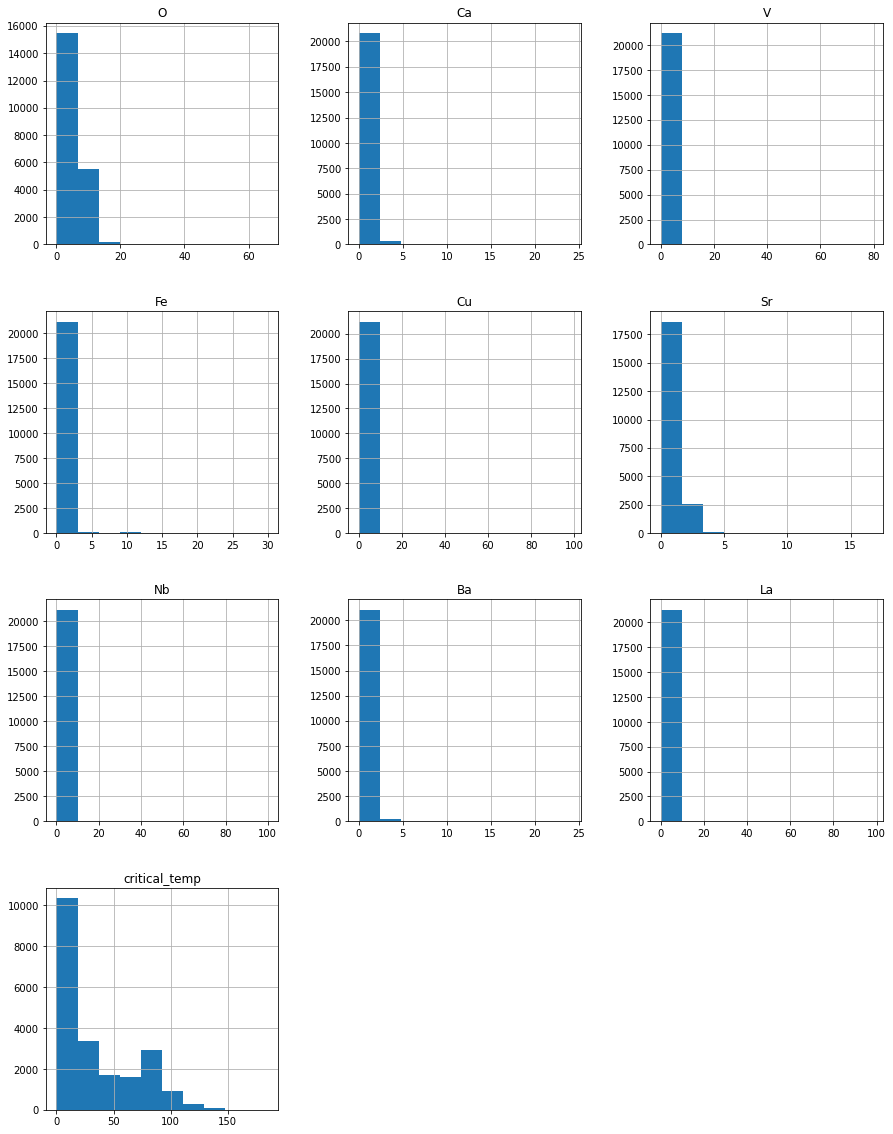

In [37]:
row_unique_cols = df_material.columns[df_material.nunique() > 213]

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_material[row_unique_cols].hist(ax = ax)

##### Correlation of Materials of Superconductors
With material data, heatmap of correlation is created as below. It shows that only Oxygen(O), Copper(Ca), and Barium(Ba) has highest correlation with more than 0.5. Next highest correlation is Calcium(Ca) which only has 0.3 correlation. Since the variables are very sparsed, it may necessary to combine less correlated features into one data to dense the dataset.

Text(0.5, 1.0, 'Material Correlation Heat Map')

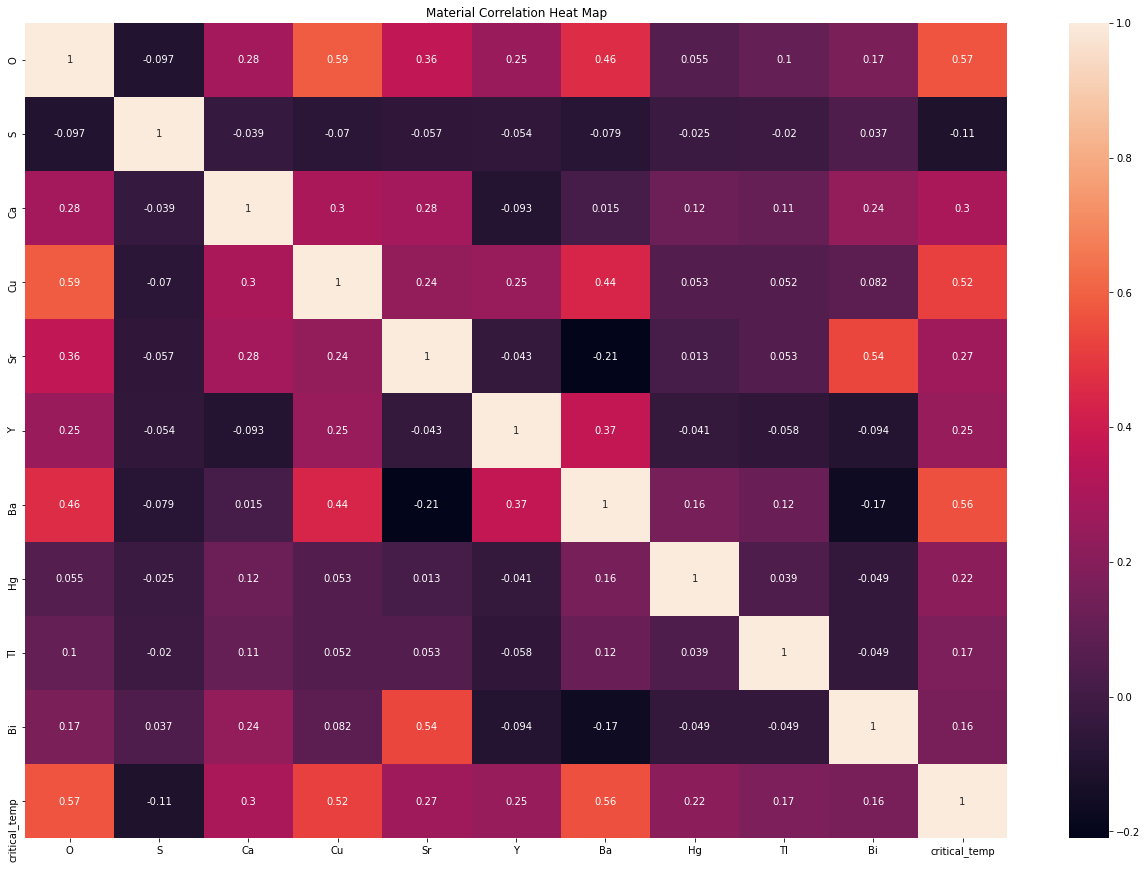

In [38]:
corr_material_matrix = df_material.corr()
corr_mat_index = corr_material_matrix[abs(corr_material_matrix['critical_temp']) > 0.1]['critical_temp'].index

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr_material_matrix.loc[corr_mat_index, corr_mat_index], annot=True)
plt.title("Material Correlation Heat Map")

### EDA feature data

##### Correlation of Property features of Superconductors

Since there are lots of features in the dataset, correlation has been measured first in order to identify potential important features that impact the prediction of the target variable, which is critical temperature. There are two indication found from the heatmap.
1. Among all the features, features with high correlated with critical temperature are displayed in heatmap. From the heatmap, Thermal Conductivity related features are highly correlated with critical temperatures and Valence related features are negatively correlated with critical temperatures.
2. Some features are highly correlated each other, such as wtd_std_ThermalConductivity and std_ThermalConductivity

Text(0.5, 1.0, 'Property Feature Correlation Heat Map')

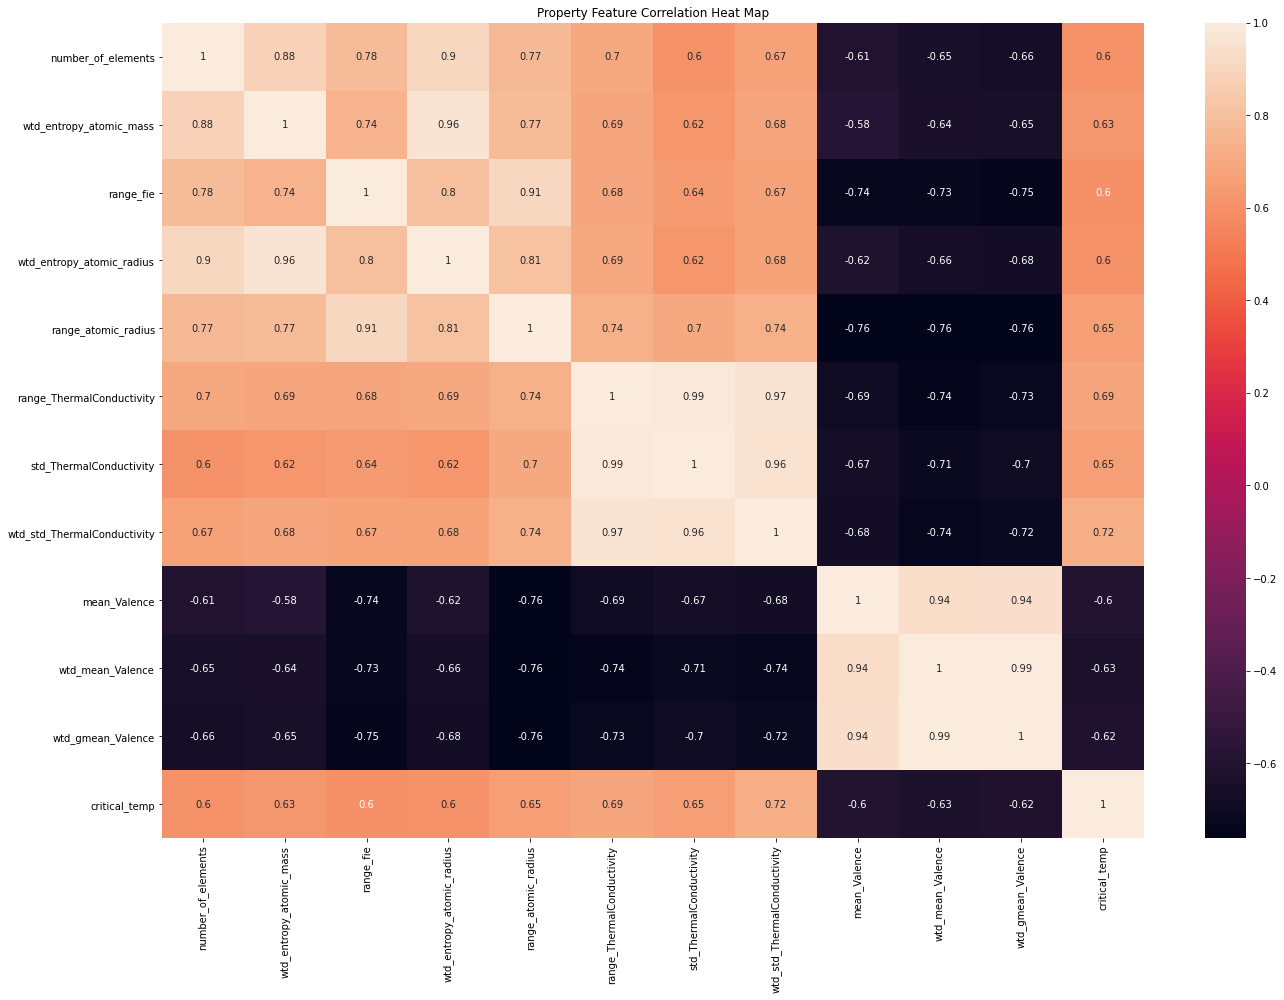

In [39]:
corr_properties_matrix = df_feature.corr()
corr_properties_index = corr_properties_matrix[abs(corr_properties_matrix['critical_temp']) > 0.6]['critical_temp'].index

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr_properties_matrix.loc[corr_properties_index, corr_properties_index], annot=True)
plt.title("Property Feature Correlation Heat Map")

##### Positive Correlated Features vs Critical Temp
The graphical analysis is made with two thermal conductivity features, one is range and one is weighted standard deviation. There is a trend that as values increases, the critical temperatures increases.
- For the range thermal conductivity, it shows that range between 200 to 400, it has small temperature but when it reachs around 400 the temperature dramatically increases. 
- For the weighted standard deviation of thermal conductivity, it shows that the critical temperature increases as values increases upto 200. When the standard deviation is greater than 200, the temperature dramatically decreases.

<AxesSubplot:xlabel='range_ThermalConductivity', ylabel='critical_temp'>

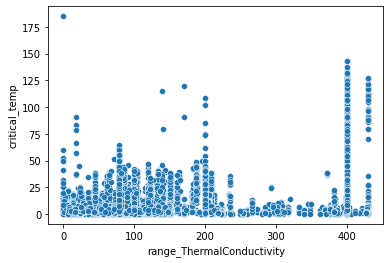

In [40]:
sns.scatterplot(x='range_ThermalConductivity', y='critical_temp', data=full_df)

<AxesSubplot:xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>

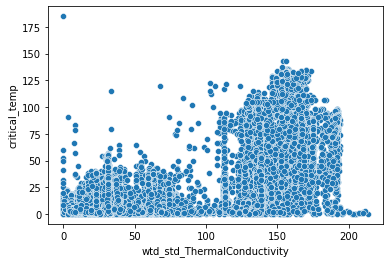

In [41]:
sns.scatterplot(x='wtd_std_ThermalConductivity', y='critical_temp', data=full_df)

##### Negative Correlated Features vs Critical Temp
There are two features, mean_Valence and wtd_mean_Valence, that are negatively correlated with critical temperature. As the values increases, the critical temperature decreases. It shows that when mean valence is at 2, critical temperature seems to be at the hight points. This also indicates that these two features might be highly correlated as its graphs show similar results.

<AxesSubplot:xlabel='mean_Valence', ylabel='critical_temp'>

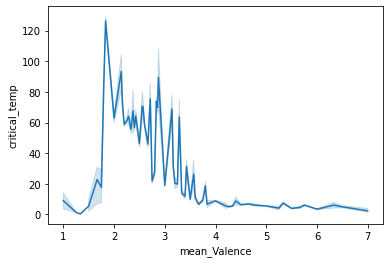

In [42]:
sns.lineplot(x='mean_Valence', y='critical_temp', data=full_df)

<AxesSubplot:xlabel='wtd_mean_Valence', ylabel='critical_temp'>

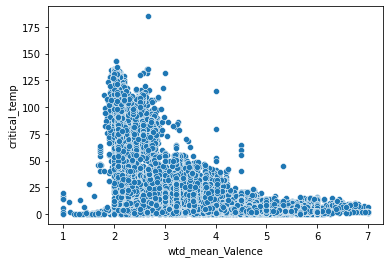

In [43]:
sns.scatterplot(x='wtd_mean_Valence', y='critical_temp', data=full_df)

##### Highly correlated Features
In the properties of superconductor dataset, there are similar features that ones are weighted and ones are unweighted. As the below graphs show, they are also highly correlated. This may makes it hard to interpret the coefficients, and it reduces the power of the model to identify independent variables that are statistically significant. This indicates that it may require to alter the columsn or to use Ridge regression which reduce variances on the estimates.

<AxesSubplot:xlabel='wtd_mean_Valence', ylabel='mean_Valence'>

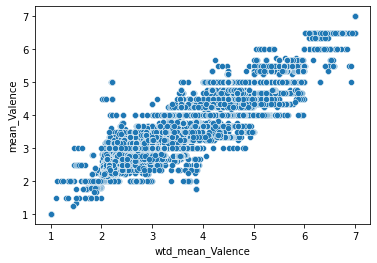

In [44]:
sns.scatterplot(x='wtd_mean_Valence', y='mean_Valence', data=full_df)

<AxesSubplot:xlabel='wtd_std_ThermalConductivity', ylabel='std_ThermalConductivity'>

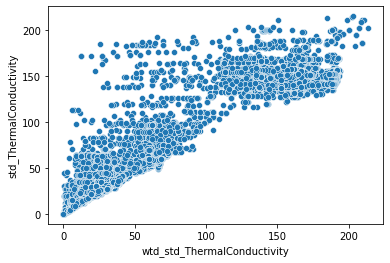

In [74]:
sns.scatterplot(x='wtd_std_ThermalConductivity', y='std_ThermalConductivity', data=full_df)

In [87]:
correlated_features = []
correlation_matrix = df_feature.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: \n')
for x in correlated_features:
    print(x)

Highly correlated feature pairs are: 

['wtd_mean_atomic_mass', 'wtd_gmean_atomic_mass']
['range_atomic_mass', 'std_atomic_mass']
['mean_fie', 'gmean_fie']
['wtd_mean_fie', 'wtd_gmean_fie']
['number_of_elements', 'entropy_fie']
['entropy_atomic_mass', 'entropy_fie']
['range_fie', 'std_fie']
['wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius']
['number_of_elements', 'entropy_atomic_radius']
['entropy_atomic_mass', 'entropy_atomic_radius']
['entropy_fie', 'entropy_atomic_radius']
['wtd_entropy_atomic_mass', 'wtd_entropy_atomic_radius']
['range_atomic_radius', 'std_atomic_radius']
['range_atomic_radius', 'wtd_std_atomic_radius']
['gmean_Density', 'wtd_gmean_Density']
['range_Density', 'std_Density']
['range_ElectronAffinity', 'std_ElectronAffinity']
['wtd_mean_FusionHeat', 'wtd_gmean_FusionHeat']
['range_FusionHeat', 'std_FusionHeat']
['range_ThermalConductivity', 'std_ThermalConductivity']
['range_ThermalConductivity', 'wtd_std_ThermalConductivity']
['std_ThermalConductivity', 'wtd_std_

## Feature Selection

In [82]:
X = full_df.drop(columns=['critical_temp'], inplace=False)
y = full_df['critical_temp']

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
df_material['Other_Materials'] = df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])].sum(axis=1)

In [85]:
df_material_new = df_material.drop(df_material.columns.difference(['O','Cu','Ba', 'Ca', 'Other_Materials']), 1, inplace=False)

In [88]:
full_df_new = pd.concat([df_material_new, df_feature], axis=1, ignore_index=True)
full_df_new.columns = df_material_new.columns.values.tolist() + df_feature.columns.values.tolist()

In [89]:
full_df_new

,O,Ca,Cu,Ba,Other_Materials,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4.0,0.0,1.0,0.20,5.40,4,88.944468,57.862692,66.361592,36.116612,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,4.0,0.0,0.9,0.10,6.00,5,92.729214,58.518416,73.132787,36.396602,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4.0,0.0,1.0,0.10,5.70,4,88.944468,57.885242,66.361592,36.122509,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4.0,0.0,1.0,0.15,5.55,4,88.944468,57.873967,66.361592,36.119560,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4.0,0.0,1.0,0.30,5.10,4,88.944468,57.840143,66.361592,36.110716,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0.0,0.0,0.00,27.00,4,106.957877,53.095769,82.515384,43.135565,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,11.0,3.0,4.0,2.00,3.00,5,92.266740,49.021367,64.812662,32.867748,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,0.0,0.0,0.0,0.00,3.00,2,99.663190,95.609104,99.433882,95.464320,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,0.0,0.0,0.0,0.00,3.00,2,99.663190,97.095602,99.433882,96.901083,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Outliers

In [90]:
X_new = full_df_new.drop(columns=['critical_temp'], inplace=False)
y_new = full_df_new['critical_temp']

In [91]:
from scipy import stats

z_scores = stats.zscore(full_df_new)

abs_z_scores = np.abs(z_scores)
abs_z_scores

array([[0.25996474, 0.28618976, 0.13309626, ..., 0.83837245, 0.52006971,
        0.15826733],
       [0.25996474, 0.28618976, 0.18118875, ..., 0.42686578, 0.45082134,
        0.24584948],
       [0.25996474, 0.28618976, 0.13309626, ..., 0.83837245, 0.50330427,
        0.45020782],
       ...,
       [0.78947459, 0.28618976, 0.61402119, ..., 0.7001588 , 0.60141582,
        0.94709052],
       [0.78947459, 0.28618976, 0.61402119, ..., 0.7001588 , 0.46423977,
        0.95117769],
       [0.78947459, 0.28618976, 0.61402119, ..., 1.18612097, 1.81314381,
        0.63121092]])

In [93]:
abs_z_scores.drop(abs_z_scores[(abs_z_scores > 5).any(1)].index, axis=0,inplace=True)
abs_z_scores.index

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [72]:
df_processed = full_df_new.iloc[abs_z_scores.index, :]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [73]:
df_processed

NameError: name 'df_processed' is not defined

In [ ]:
X_new = df_processed.drop(columns=['critical_temp'], inplace=False)
y_new = df_processed['critical_temp']

# Normalization

In [ ]:
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Model Building

When building the L1 and L2 models, the metric used to determine which model performed the best was the Mean Square Error. To maximize the usage of the full dataset, 5-Fold Cross Validation is utilized for sampling. To tune both the L1 and L2 models, varying alpha's were used to pick the best of the choices. With the usage of alpha tuning and cross validation the best L1 and L2 model can be built.

For the L1 model, the best result was a MSE of 318.13 with an alpha of 0.01. For the L2 model the best result was a MSE of 318.42 with an alpha of 17. While the L1 model performed better, the L2 model performance was incredible close to the L1 model. While both models would be valid choices for this problem, L1 as the added benefit of feature reduction which is beneficial with number for variables in this dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ln_model = LinearRegression()
ln_model.fit(X_new_scaled, y_new)
abs(cross_val_score(ln_model, X_new_scaled, y_new, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

l1_params = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 'random_state': [42]}
# l2_params = {'alpha':np.linspace(5,20,4)}

l1_grid_search = GridSearchCV(Lasso(), l1_params, cv=5, scoring='neg_mean_absolute_percentage_error', 
                           return_train_score=True, n_jobs=-1)
l1_grid_search.fit(X_new_scaled, y_new)

In [ ]:
l1_grid_search.best_estimator_

In [ ]:
abs(cross_val_score(l1_grid_search.best_estimator_, X_new_scaled, y_new, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
sorted(zip(abs(l1_grid_search.best_estimator_.coef_), df_processed.columns.values.tolist()[0:-1]), reverse=True)

In [ ]:
from sklearn.linear_model import Ridge

l2_params = {'alpha':[15, 16, 17, 18, 20], 'random_state': [42]}

l2_grid_search = GridSearchCV(Ridge(), l2_params, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
l2_grid_search.fit(X_new_scaled, y_new)

In [ ]:
l2_grid_search.best_estimator_

In [ ]:
abs(cross_val_score(l2_grid_search.best_estimator_, X_new_scaled, y_new, cv=5, scoring='neg_mean_squared_error')).mean()

In [ ]:
sorted(zip(abs(l2_grid_search.best_estimator_.coef_), df_processed.columns.values.tolist()[0:-1]), reverse=True)

# Model Evaluation 

With the higher performing model (L1), the most important variables in determine critical temperature were variables related to Entropy, Electron Affinity, FIE and Atomic Mass. These variables aim to measure the material's general properties, which makes sense in under standing how these materials would behave when electrical currents are ran through them. While many elements were used in understanding critical temperature, most were not significantly important to determining critical temperature. The only element to be in the top 20 most important variables in determining critical temperature was Barium. 

# Conclusion

When determining critical temperature the best model to use is L1. The feature reduction this model provides for this dataset is invaluable. To maximize the results this model, data cleaning and normalized will be vital. When removing outliers it is important to evaluate this independently to prevent important information that might be loss in these observations.

While an alternative model that is more powerful could be used on this dataset, linear regression is powerful and easy to understand. This basic, but powerful model will help scientist to make more education decisions on what to look for when making future superconductors.